## Influence of US-Presidential Election on the Volatility of the S&P500


### 1. Data Collection

#### 1.1. Return Dataset from the S&P500
   - Collect historical daily closing prices of the S&P500 index.
   - Ensure the dataset includes relevant features such as date and adjusted close prices.

#### 1.2. Presidential Election Dataset
   - Collect a dataset containing U.S. presidential election dates and political party information (Republican or Democrat).
   - Include columns for the date of the election and the party of the winning president.

#### 1.3. Merging the Datasets
   - Merge the S&P500 volatility dataset with the presidential election dataset.
   - Align dates and ensure proper merging to capture the election period impact on volatility.

### 2. Visualizing Volatility
   - Use line plots to visualize the daily and annual volatility of the S&P500.
   - Highlight key election years to see if volatility spikes around elections.

### 3. Hypothesis
   - Formulate a hypothesis: Does political party leadership (Republican vs. Democrat) influence the volatility of the stock market? 
   - Explore whether election periods show
   
### 4. Multiple Regression Analysis

#### 4.1. Regression for Daily Volatility
   - Run a regression analysis with daily volatility as the dependent variable.

#### 4.2. Regression for Yearly Volatility
   - Run a regression analysis for yearly volatility.
   
### 5. Interpretation 
#### 5.1 Daily Volatility
#### 5.2 Yearly Volatility

### 6. Whats next?



## 1. Data Collection

Here we need Data the Volatitly Data from the S&P500 raging from 1960 to 2020. I used the yfinance library to access it

Furthermore, we need a dataset that contains, the actual date of the appointment of the president, and the according political party

### 1.1 Return Dataset from the S&P500

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

raw_data = yf.download(tickers = "^GSPC", start = "1960-01-01", end = "2022-12-31",
                      interval = "1d" )

[*********************100%%**********************]  1 of 1 completed


#### Daily Volatility

In [2]:
raw_data["return"] = raw_data.Close.pct_change()
raw_data["volatility"] = raw_data["return"].rolling(window = 30).std()*100
raw_data = raw_data.dropna()
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume,return,volatility
Date,,,,,,,,
1960-02-15,55.169998,55.169998,55.169998,55.169998,55.169998,2780000,-0.005229,0.702225
1960-02-16,54.730000,54.730000,54.730000,54.730000,54.730000,3270000,-0.007975,0.678226
1960-02-17,55.029999,55.029999,55.029999,55.029999,55.029999,4210000,0.005481,0.696286
1960-02-18,55.799999,55.799999,55.799999,55.799999,55.799999,3800000,0.013992,0.756077
1960-02-19,56.240002,56.240002,56.240002,56.240002,56.240002,3230000,0.007885,0.777888


####  Monthly Volatility

In [3]:
raw_data_m = raw_data
raw_data_m = raw_data["return"].resample('M').std()*np.sqrt(31)*100
raw_data_m= raw_data_m.reset_index()
raw_data_m.columns = ["Date", "Monthly_Volatility"]
raw_data_m.head()

,Date,Monthly_Volatility
0,1960-02-29,3.869516
1,1960-03-31,3.601157
2,1960-04-30,3.830282
3,1960-05-31,2.402530
4,1960-06-30,2.685729


#### Yearly Volatility

In [4]:
raw_data_y = raw_data
raw_data_y = raw_data["return"].resample('Y').std()*np.sqrt(252)*100
raw_data_y = raw_data_y.reset_index()
raw_data_y.columns = ["Date", "Yearly_Volatility"]
raw_data_y.head()

,Date,Yearly_Volatility
0,1960-12-31,10.195625
1,1961-12-31,10.115920
2,1962-12-31,16.539006
3,1963-12-31,8.622205
4,1964-12-31,5.260462


### 1.2 Presidential Election Dataset

In [5]:
appointment_dates = pd.read_excel("Presidential Dataset.xlsx")
appointment_dates.rename({"Inauguration Date": "Date"}, axis = 1, inplace = True)
appointment_dates.Date = pd.to_datetime(appointment_dates.Date)
appointment_dates = appointment_dates.loc[((appointment_dates.Date) >= "1961-01-20") & ((appointment_dates.Date) <="2021-01-20")]
appointment_dates.head()

,President,Date,Political Party
34,John F. Kennedy,1961-01-20,Democratic
35,Lyndon B. Johnson,1963-11-22,Democratic
36,Richard Nixon,1969-01-20,Republican
37,Gerald Ford,1974-08-09,Republican
38,Jimmy Carter,1977-01-20,Democratic


In [6]:
dummies = pd.get_dummies(appointment_dates["Political Party"])
appointment_dates = pd.concat([appointment_dates, dummies], axis = 1)
appointment_dates["DOF"] = 1 #DOF = Day / Yearof Appointment
appointment_dates.head()

,President,Date,Political Party,Democratic,Republican,DOF
34,John F. Kennedy,1961-01-20,Democratic,1,0,1
35,Lyndon B. Johnson,1963-11-22,Democratic,1,0,1
36,Richard Nixon,1969-01-20,Republican,0,1,1
37,Gerald Ford,1974-08-09,Republican,0,1,1
38,Jimmy Carter,1977-01-20,Democratic,1,0,1


### 1.3 Merging the Datasets

### Daily Volatility Dataset

In [7]:
date_range = pd.date_range(start="1960-02-15", end="2022-12-30", freq='D')
full_dates_df = pd.DataFrame(date_range, columns=['Date'])
full_appointments = pd.merge(full_dates_df,appointment_dates[["Date","Democratic", "Republican", "DOF"]], on = "Date", how = "left")
full_appointments["Democratic"].fillna(0,inplace=True)
full_appointments["Republican"].fillna(0,inplace=True)
full_appointments["DOF"].fillna(0,inplace=True)
df_daily = pd.merge(full_appointments, raw_data.volatility, on = "Date", how = "left")

In [8]:
df_daily = df_daily.fillna(method='ffill')

In [9]:
df_daily.drop(columns=["Republican"], axis = 1, inplace = True)
df_daily.Date = pd.to_datetime(df_daily.Date)
df_daily["Quarter"] = df_daily.Date.dt.quarter
df_daily_dummies = pd.get_dummies(df_daily, columns=["Quarter"], drop_first = True)
df_daily_dummies.head()

,Date,Democratic,DOF,volatility,Quarter_2,Quarter_3,Quarter_4
0,1960-02-15,0.0,0.0,0.702225,0,0,0
1,1960-02-16,0.0,0.0,0.678226,0,0,0
2,1960-02-17,0.0,0.0,0.696286,0,0,0
3,1960-02-18,0.0,0.0,0.756077,0,0,0
4,1960-02-19,0.0,0.0,0.777888,0,0,0


### Monthly Volatility

In [11]:
date_range = pd.date_range(start="1960-02-15", end="2022-12-30", freq='M')
full_dates = pd.DataFrame(date_range, columns = ['Date'])
full_appointments = pd.merge(full_dates, appointment_dates[["Date", "Democratic", "Republican", "DOF"]], on = "Date", how = "left")
full_appointments["Democratic"].fillna(0,inplace=True)
full_appointments["Republican"].fillna(0,inplace=True)
full_appointments["DOF"].fillna(0,inplace=True)

In [12]:
df_monthly = raw_data_m.merge(full_appointments, on = "Date")
df_monthly.drop(columns=["Republican"], axis = 1, inplace = True)
df_monthly["Quarter"] = df_monthly.Date.dt.quarter
df_monthly_dummies = pd.get_dummies(df_monthly, columns=["Quarter"], drop_first=True)
df_monthly_dummies.head()

,Date,Monthly_Volatility,Democratic,DOF,Quarter_2,Quarter_3,Quarter_4
0,1960-02-29,3.869516,0.0,0.0,0,0,0
1,1960-03-31,3.601157,0.0,0.0,0,0,0
2,1960-04-30,3.830282,0.0,0.0,1,0,0
3,1960-05-31,2.402530,0.0,0.0,1,0,0
4,1960-06-30,2.685729,0.0,0.0,1,0,0


### Yearly Volatility Dataset

In [13]:
appointment_dates["Year"] = appointment_dates["Date"].dt.year
raw_data_y['Year'] = raw_data_y['Date'].dt.year
df_yearly = pd.merge(appointment_dates, raw_data_y[["Year","Yearly_Volatility"]], on='Year', how='left')
df_yearly.drop(columns=["Republican"], axis = 1, inplace = True)
df_yearly.head()

,President,Date,Political Party,Democratic,DOF,Year,Yearly_Volatility
0,John F. Kennedy,1961-01-20,Democratic,1,1,1961,10.115920
1,Lyndon B. Johnson,1963-11-22,Democratic,1,1,1963,8.622205
2,Richard Nixon,1969-01-20,Republican,0,1,1969,10.037427
3,Gerald Ford,1974-08-09,Republican,0,1,1974,21.821020
4,Jimmy Carter,1977-01-20,Democratic,1,1,1977,9.075689


### Im here trying to include quarterly effects

## 2. Visualizing Volatility

A higher volatility means that the price moves significantly, while a lower volatility indicates that the price is relatively stable.

- *High volatility*: Indicates large swings in the price, both up and down. Riskier assets tend to have higher volatility.
- *Low volatility*: Indicates more stable and predictable price movements

A rolling window is a technique used in time series analysis where you calculate a statistic (like the standard deviation or mean) over a fixed number of past observations. It allows you to see how that statistic changes over time by "rolling" the window forward day by day.

For example:

- If you choose a 30-day rolling window to calculate volatility, you would compute the standard deviation of returns over the last 30 days for each new day.
- After each day, the window "rolls" forward by one day, so it always covers the most recent 30 days.

## Daily Volatility

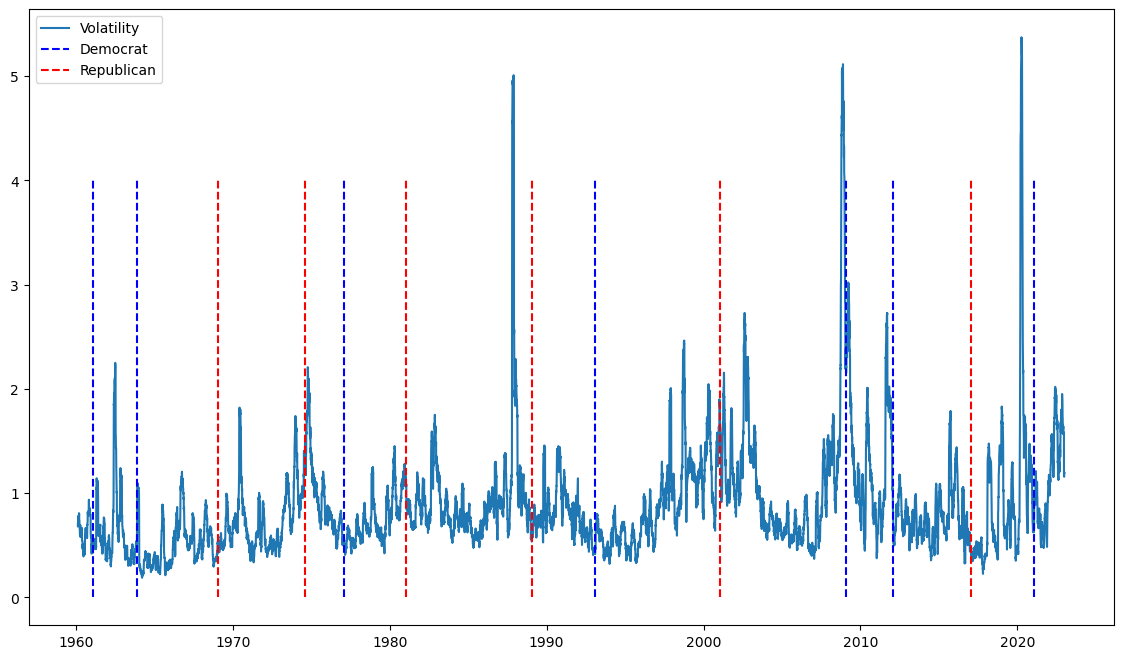

In [14]:
import matplotlib.pylab as plt

plt.figure(figsize = (14,8))
plt.plot(raw_data.index, raw_data.volatility)
plt.vlines(x = appointment_dates.Date[appointment_dates.Democratic == 1], ymin = 0, ymax = 4, color = "blue", linestyles='dashed', label = "Democrat")
plt.vlines(x = appointment_dates.Date[appointment_dates.Democratic == 0], ymin = 0, ymax = 4, color = "red", linestyles='dashed', label = "Republican" )
plt.legend(["Volatility", "Democrat", "Republican"])
plt.show()

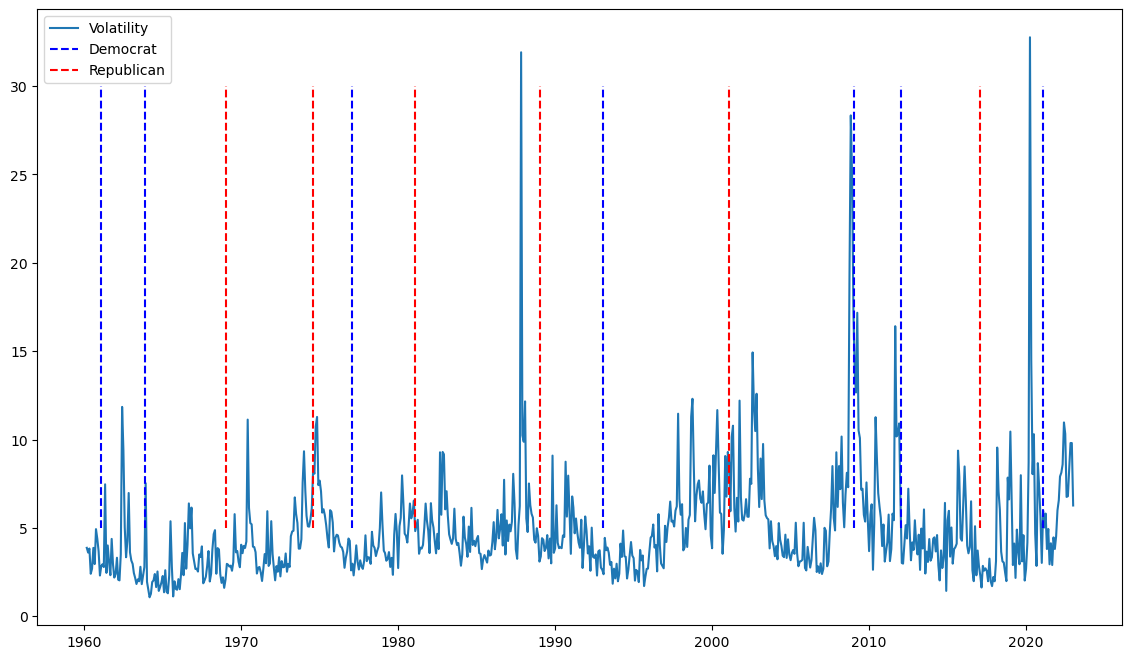

In [15]:
plt.figure(figsize = (14,8))
plt.plot(raw_data_m.Date, raw_data_m.Monthly_Volatility)
plt.vlines(x = appointment_dates.Date[appointment_dates.Democratic == 1], ymin = 5, ymax = 30, color = "blue", linestyles='dashed', label = "Democrat")
plt.vlines(x = appointment_dates.Date[appointment_dates.Democratic == 0], ymin = 5, ymax = 30, color = "red", linestyles='dashed', label = "Republican" )
plt.legend(["Volatility", "Democrat", "Republican"])
plt.show()

## Yearly Volatility

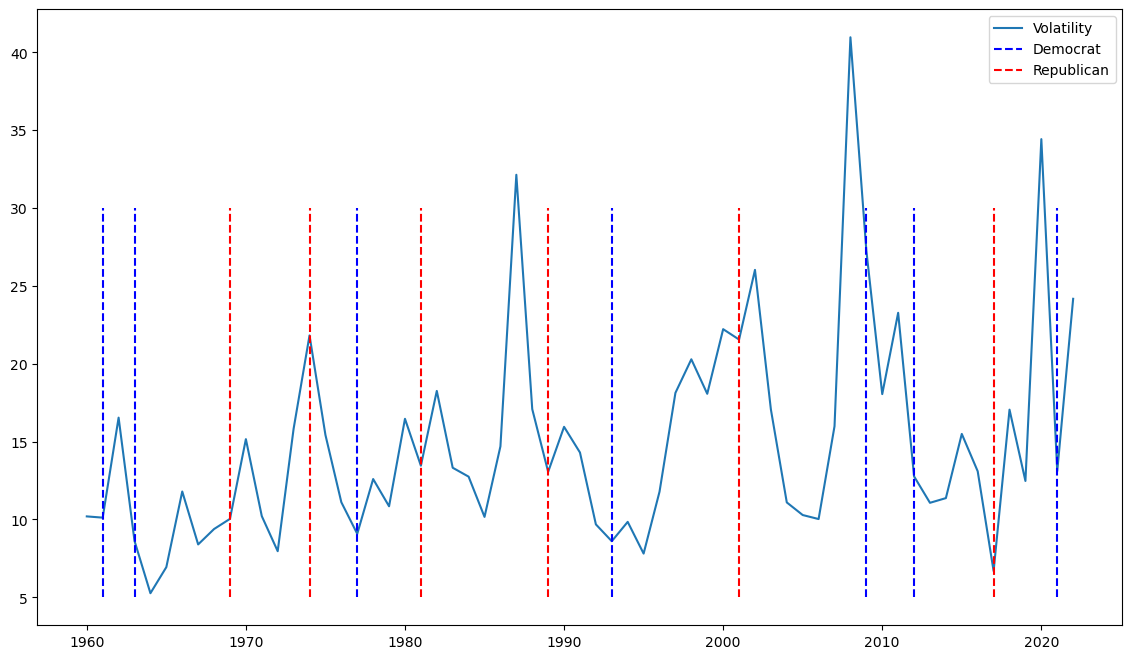

In [16]:
plt.figure(figsize = (14,8))
plt.plot(raw_data_y.Year, raw_data_y.Yearly_Volatility)
plt.vlines(x = appointment_dates.Year[appointment_dates.Democratic == 1], ymin = 5, ymax = 30, color = "blue", linestyles='dashed', label = "Democrat")
plt.vlines(x = appointment_dates.Year[appointment_dates.Democratic == 0], ymin = 5, ymax = 30, color = "red", linestyles='dashed', label = "Republican" )
plt.legend(["Volatility", "Democrat", "Republican"])
plt.show()

## 3. Hypothesis

- **Hypothesis 1** : Elections lead to increased volatility in the markets
- **Hypothesis 2** : The degree of the volatility is dependent on the political party 

**Disclaimer**: The hypothesis are not based on any literature. They are just assumptions I made for the sake of the project


### 4.1. Multiple Regression Analysis for Daily Volatility

In [ ]:
df_daily_dummies.columns

In [45]:
import statsmodels.api as sm

x = df_daily_dummies[["Democratic", "DOF", "Quarter_2", "Quarter_3", "Quarter_4"]]
x = sm.add_constant(x)
y = df_daily.volatility

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             volatility   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     38.27
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.98e-39
Time:                        16:19:09   Log-Likelihood:                -17961.
No. Observations:               22965   AIC:                         3.593e+04
Df Residuals:                   22959   BIC:                         3.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8494      0.007    120.490      0.000       0.836       0.863
Democratic    -0.0737      0.294     -0.250      0.802      -0.651       0.503
DOF            0.1070      0.216      0.495      0.621      -0.317       0.530
Quarter_2      0.0253      0.010      2.549      0.011       0.006       0.045
Quarter_3      0.0002      0.010      0.024      0.981      -0.019       0.020
Quarter_4      0.1171      0.010     11.834      0.000       0.098       0.137
==============================================================================
Omnibus:                    17476.032   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           436005.702
Skew:                           3.476   Prob(JB):                         0.00
Kurtosis:                      23.182   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
x = df_monthly_dummies[["Democratic", "DOF", "Quarter_2", "Quarter_3", "Quarter_4"]]
x = sm.add_constant(x)
y = df_monthly_dummies.Monthly_Volatility

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Monthly_Volatility   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7756
Date:                Tue, 17 Sep 2024   Prob (F-statistic):              0.508
Time:                        16:43:38   Log-Likelihood:                -1907.9
No. Observations:                 754   AIC:                             3824.
Df Residuals:                     750   BIC:                             3842.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8561      0.222     21.855      0.000       4.420       5.292
Democratic  1.082e-18   7.06e-17      0.015      0.988   -1.38e-16     1.4e-16
DOF         5.049e-19   6.21e-18      0.081      0.935   -1.17e-17    1.27e-17
Quarter_2     -0.0945      0.314     -0.301      0.763      -0.711       0.522
Quarter_3     -0.1120      0.314     -0.357      0.721      -0.728       0.504
Quarter_4      0.3096      0.314      0.985      0.325      -0.307       0.927
==============================================================================
Omnibus:                      645.741   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20374.856
Skew:                           3.718   Prob(JB):                         0.00
Kurtosis:                      27.357   Cond. No.                     2.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 4.2 Multiple Regression for Yearly Volatility 

In [14]:
import statsmodels.api as sm

x = df_yearly[["Democratic", "DOF"]]
x = sm.add_constant(x)
y = df_yearly.Yearly_Volatility

model = sm.OLS(y,x).fit()
model.summary()

D:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Yearly_Volatility   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                    0.2107
Date:                Tue, 17 Sep 2024   Prob (F-statistic):              0.655
Time:                        15:39:33   Log-Likelihood:                -41.536
No. Observations:                  13   AIC:                             87.07
Df Residuals:                      11   BIC:                             88.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Democratic    -1.6397      3.573     -0.459      0.655      -9.503       6.223
DOF           14.4351      2.622      5.506      0.000       8.665      20.205
==============================================================================
Omnibus:                        5.594   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                2.886
Skew:                           1.133   Prob(JB):                        0.236
Kurtosis:                       3.442   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Interpretation

## 5. Results of Regression Analysis

### 5.1 Daily Volatility
- **Outcome:** Volatility --> not significant (according to p-value).
- The daily volatility did not show significant influence from political factors based on the regression analysis.

### 5.2 Yearly Volatility
- **Outcome:** High significance with DOF (Day / Year of Appointment of the President).
- Significant influence of political parties on volatility was observed.
- **Insight:** There is more market volatility in years when a Republican President was appointed, compared to years with a Democratic President.

## 6. What's Next?

### 6.1 Modelling Future Volatility Using GARCH/ARIMA
- Plan to model volatility using GARCH (Generalized Autoregressive Conditional Heteroskedasticity) or ARIMA (AutoRegressive Integrated Moving Average) to capture time-varying volatility.
- **Objective:** GARCH/ARIMA can help model the volatility clustering in the market, as volatility is often not constant over time.

### 6.2 Including Additional Variables
- Consider adding more economic variables to the model to enhance the analysis:
  - **GDP Growth:** Capturing the state of the economy and its influence on market volatility.
  - **Overall Economic State:** Include metrics like inflation, unemployment, interest rates, or market sentiment to control for broader macroeconomic factors.
  - **Global Events:** Major global crises (financial crises, pandemics, etc.) that might affect volatility independently of political factors.

- **Question:** Should we include these variables to see if they further explain volatility patterns? It would likely provide a more robust model, especially with time series forecasting models like GARCH/ARIMA.
